In [69]:
#import needed modules
import pandas as pd
import csv

In [70]:
#set the path to the csv file
filepath = '../week_05/JEOPARDY_CSV.csv'
#Use read.csv to read in the information from the csv jeopardy file. 
jeopardy_df = pd.read_csv(filepath)

In [71]:
#Use .head() to see the information in the dataframe.
jeopardy_df.head()


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


# How many rows are there in the dataframe?

In [72]:
#Use .head(-1) to find out how many rows are in the data frame.  This shows there are 216,929 rows. 
jeopardy_df.head(-1)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216924,4999,5/11/2006,Double Jeopardy!,OFF-BROADWAY,"$2,000",In 2006 the cast of this long-running hit emba...,Stomp
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,"$2,000",This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS","$2,000",In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$2,000","In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker


#  What does each row represent? What is the "grain"?
A row represents a question from an episode of jeopardy.
"Grain" is the frequency/interval for which data is collected (or the smallest unit of data), so the grain is a question in an episode.

# Clean the data.  What is "dirty" about the data?
It is "dirty" data because the date is in the incorrect format. Also spaces should be removed from column names.

In [73]:
#Create a new column changing the Air Date to a different format using datetime.
jeopardy_df['Date'] = pd.to_datetime(jeopardy_df[' Air Date'])
#Create a new column getting the year of each episode (needed for future questions)
jeopardy_df['year'] = pd.DatetimeIndex(jeopardy_df['Date']).year
#Remove the spaces from the column names to make the dataframe easier to work with. 
jeopardy_df.columns = jeopardy_df.columns.str.replace(' ', '')

In [74]:
#use .head() to print out the first few lines of the dataframe and make sure the new changes look correct.
jeopardy_df.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Date,year
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004-12-31,2004
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004-12-31,2004
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004-12-31,2004
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004-12-31,2004
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004-12-31,2004


# Find out the number of unique shows there were each year.

In [63]:
#group the data by year 
grouped_data = jeopardy_df.groupby('year')

In [64]:
#get the number of unique shows per year by using the nunique function
num_shows_per_year = grouped_data['ShowNumber'].nunique()

In [65]:
#print out the number of unique shows per year
print(num_shows_per_year)

year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: ShowNumber, dtype: int64


# How many times was each category used? 

In [83]:
#group the data by category
cat_grouped_data = jeopardy_df.groupby("Category")

In [112]:
#find the number of times each category was used using count function
num_per_category = cat_grouped_data["Category"].count()

In [121]:
#print out the category and number of times each category was used
print((num_per_category).sort_values(ascending = False))

Category
BEFORE & AFTER           547
SCIENCE                  519
LITERATURE               496
AMERICAN HISTORY         418
POTPOURRI                401
                        ... 
THE THIRD CENTURY          1
IN VENICE                  1
BOOK TITLE REFERENCES      1
POETIC SUBJECTS            1
GEOGRAPHIC MEANINGS        1
Name: Category, Length: 27983, dtype: int64


# What month over the years has had the most shows?

In [122]:
#Create a new column getting the month of each episode
jeopardy_df['month'] = pd.DatetimeIndex(jeopardy_df['Date']).month

In [132]:
#print out the first few rows to make sure formatting looks good
jeopardy_df.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Date,year,month
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004-12-31,2004,12
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004-12-31,2004,12
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004-12-31,2004,12
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004-12-31,2004,12
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004-12-31,2004,12


In [133]:
#group the dataset by month
grouped_month_data = jeopardy_df.groupby("month")

In [137]:
#Count the number of unique shows in each month
num_of_shows_per_month = grouped_month_data["ShowNumber"].nunique()

In [138]:
#print out number of shows
num_of_shows_per_month


month
1     355
2     293
3     329
4     330
5     351
6     321
7     256
9     272
10    347
11    434
12    352
Name: ShowNumber, dtype: int64

November has had the greatest number of unique shows per month.

# Are there any answers that appeared multiple times? Find the question for the top three most common answers. 

In [140]:
#group the data by answers. 
grouped_ans_df = jeopardy_df.groupby("Answer")

In [144]:
#Find the number of times each answer appeared
num_per_answer = grouped_ans_df["Answer"].count()

In [145]:
#print out the number of times each question was answered in descending order to find the top 5 answers. 
print((num_per_answer).sort_values(ascending = False))

Answer
China        216
Australia    215
Japan        196
Chicago      194
France       193
            ... 
a bongo        1
a bonfire      1
a bone         1
a bonbon       1
 Hamlet        1
Name: Answer, Length: 88236, dtype: int64


The top five answers are China, Australia, Japan, Chicago and France


In [157]:
#Find the questions for the top 3 most common answers. 
question_df = jeopardy_df[jeopardy_df['Answer'].str.contains('China|Australia|Japan', na=False)]

In [158]:
question_df['Question']

404       In February 1904 this country attacked the Rus...
560       A 1994 festival honoring this country featured...
598       In 1958 this country launched its second 5-yea...
622       This 1904-1905 war began in Manchuria & ended ...
688       Large aboriginal populations live in this coun...
                                ...                        
215568                                                Kirin
215912    Because of a policy adopted in 1979, this coun...
216044    Norfolk Island & the Republic of Kiribati use ...
216150    Colorful patches called p'u-fang used to indic...
216660            In Asia: Prime Minister Junichiro Koizumi
Name: Question, Length: 804, dtype: object

# Create a Visualization to show the top 5 Categories (those referenced the most often)

In [164]:
#print out the number of questions per category and sort in descending order
print((num_per_category).sort_values(ascending = False))

Category
BEFORE & AFTER           547
SCIENCE                  519
LITERATURE               496
AMERICAN HISTORY         418
POTPOURRI                401
                        ... 
THE THIRD CENTURY          1
IN VENICE                  1
BOOK TITLE REFERENCES      1
POETIC SUBJECTS            1
GEOGRAPHIC MEANINGS        1
Name: Category, Length: 27983, dtype: int64


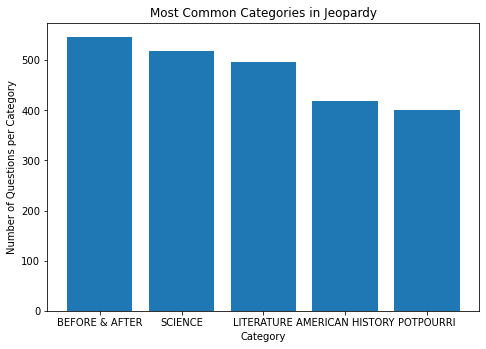

In [165]:
#import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#Create lists for categories and counts
Categories = ['BEFORE & AFTER', 'SCIENCE', 'LITERATURE', 'AMERICAN HISTORY', 'POTPOURRI']
Count = [547,519,496,418,401]
#Create bar plot
ax.bar(Categories,Count)
#Create labels for plot
plt.xlabel("Category")
plt.ylabel("Number of Questions per Category")
plt.title("Most Common Categories in Jeopardy")
#Show the plot
plt.show()